## K-NEAREST NEIGHBOURS

#### Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the data from the given zoo dataset
data=pd.read_csv('zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In the given zoo dataset we have 17 numerical columns and 1 categorical columns.

In [4]:
data.shape

(101, 18)

In [5]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


#### Tasks:
1. Analyse the data using the visualizations


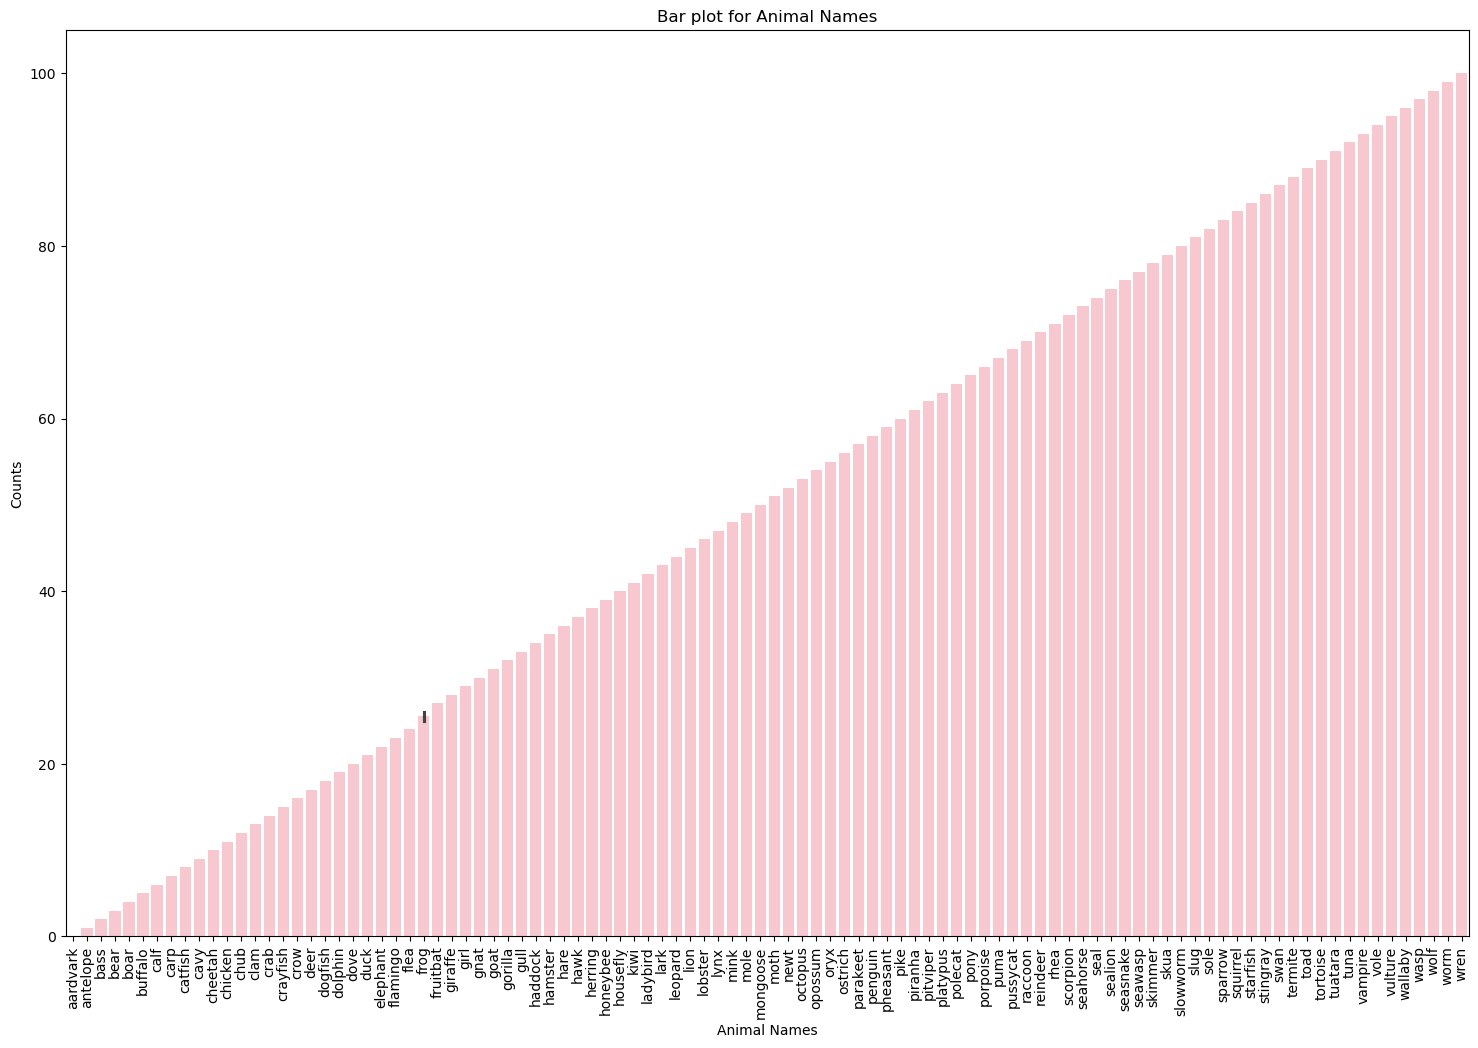

In [7]:
## Analysing the categorical column using bar plot ...plotting a graph of animal name V/s counts
plt.figure(figsize=(15,10))
sns.barplot(y=data.index,x='animal name',data=data,color='pink')
plt.xlabel("Animal Names")
plt.ylabel("Counts")
plt.title("Bar plot for Animal Names")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

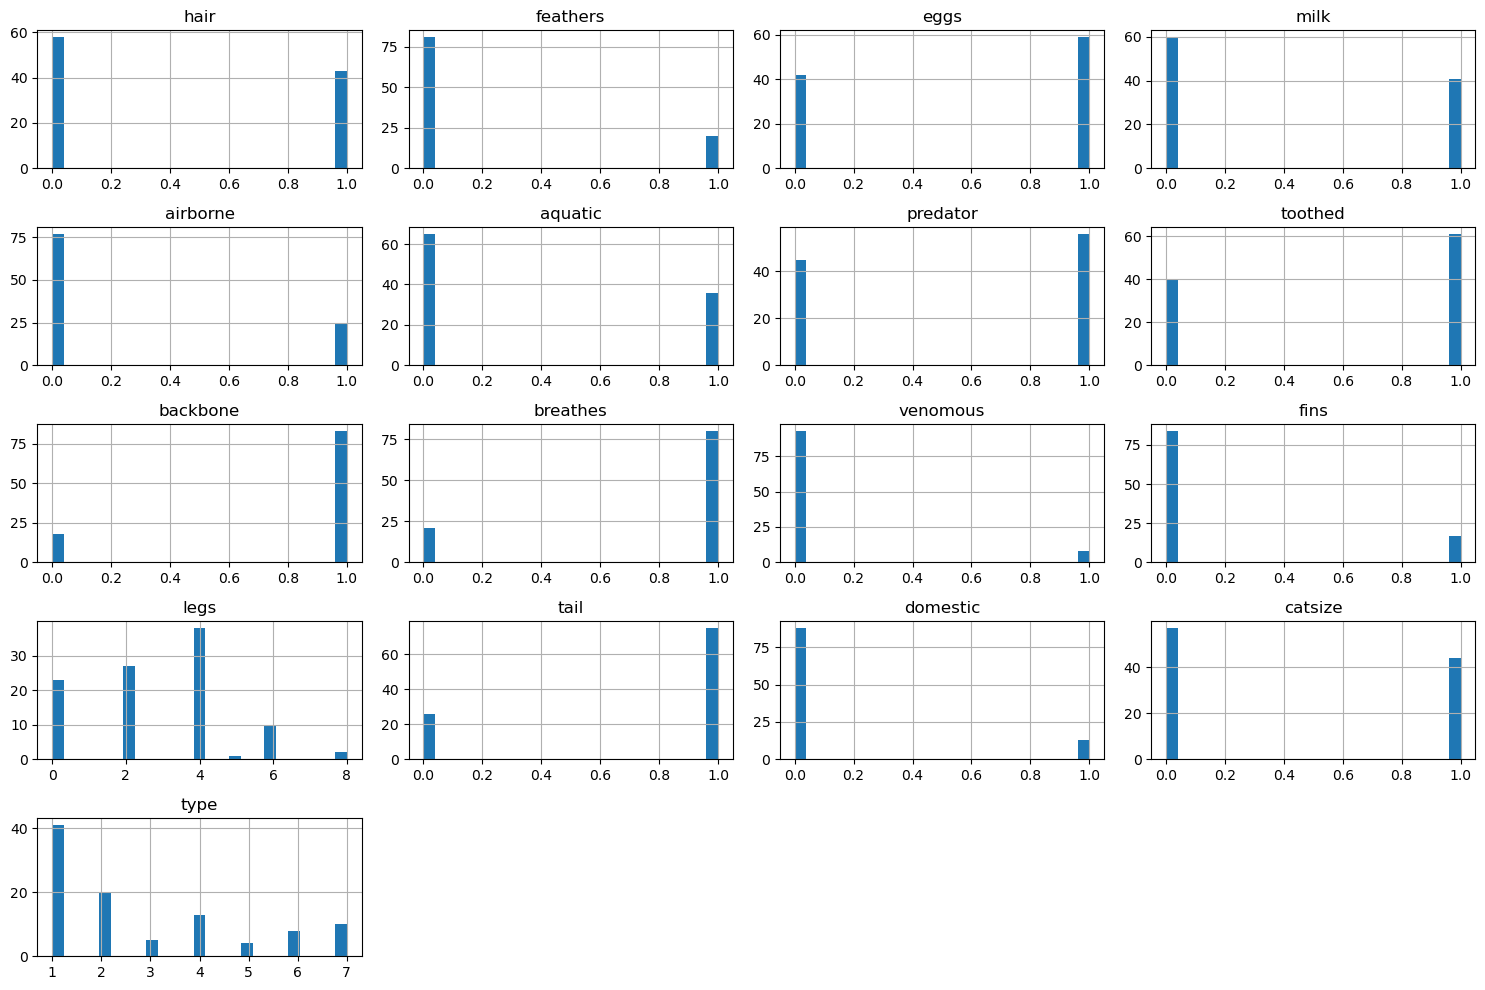

In [8]:
## Drawing the Histogram to visulasize the data 
data.hist(figsize =(15,10),bins=25)
plt.tight_layout()   ## This command will adjust the layout to prevent the overlap
plt.show()

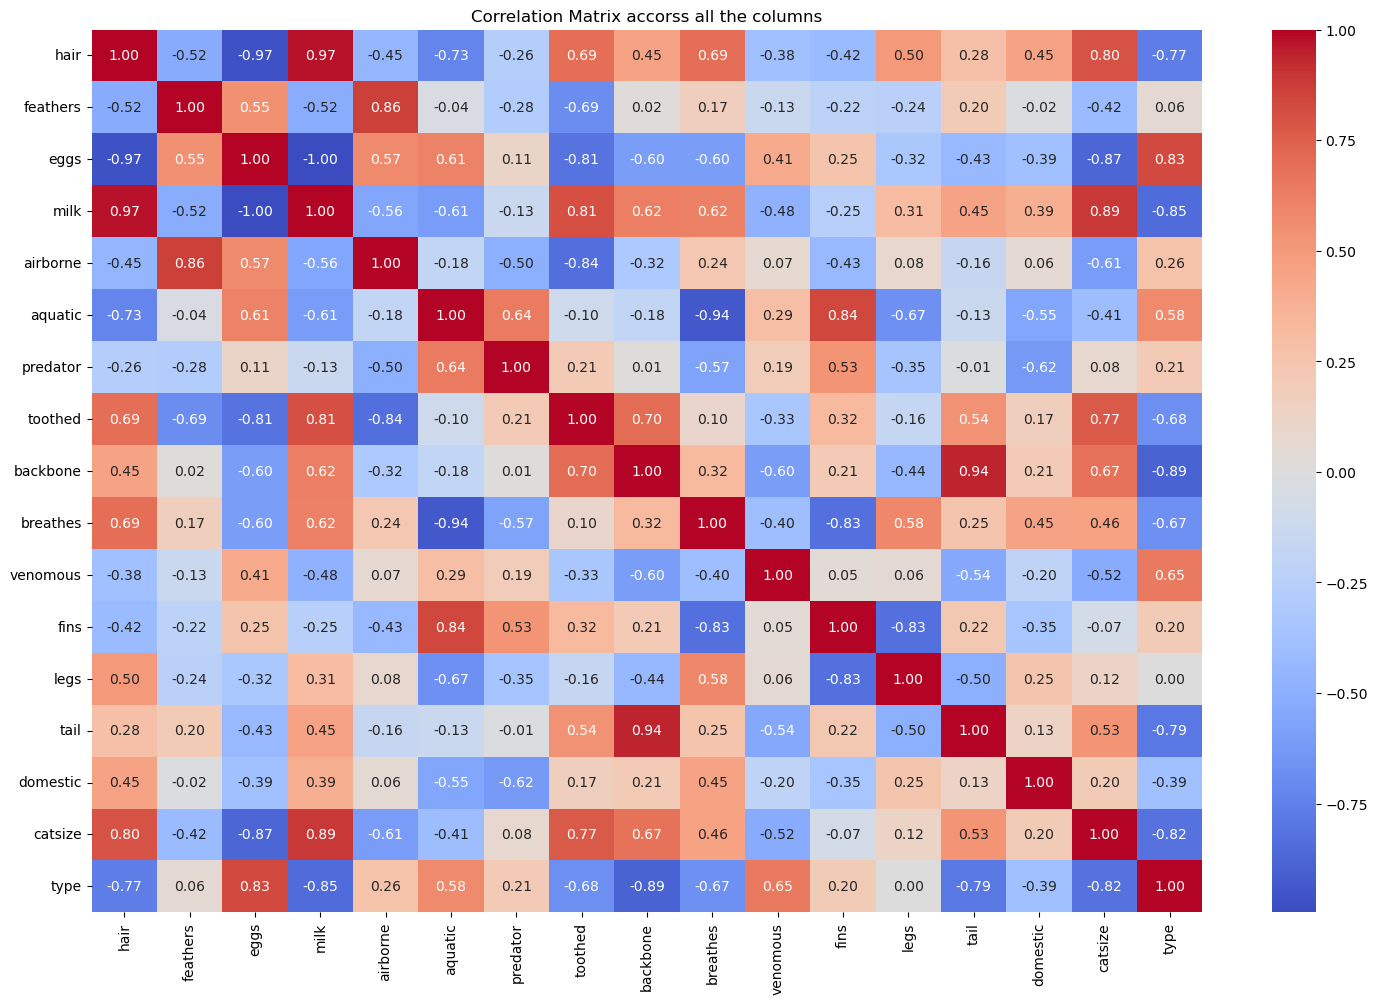

In [9]:
data_corr=data.corr(numeric_only=True)

plt.figure(figsize =(15,10))
sns.heatmap(data_corr.corr(),annot=True,cmap="coolwarm",fmt='.2f')
plt.tight_layout() 
plt.title("Correlation Matrix accorss all the columns")
plt.show()

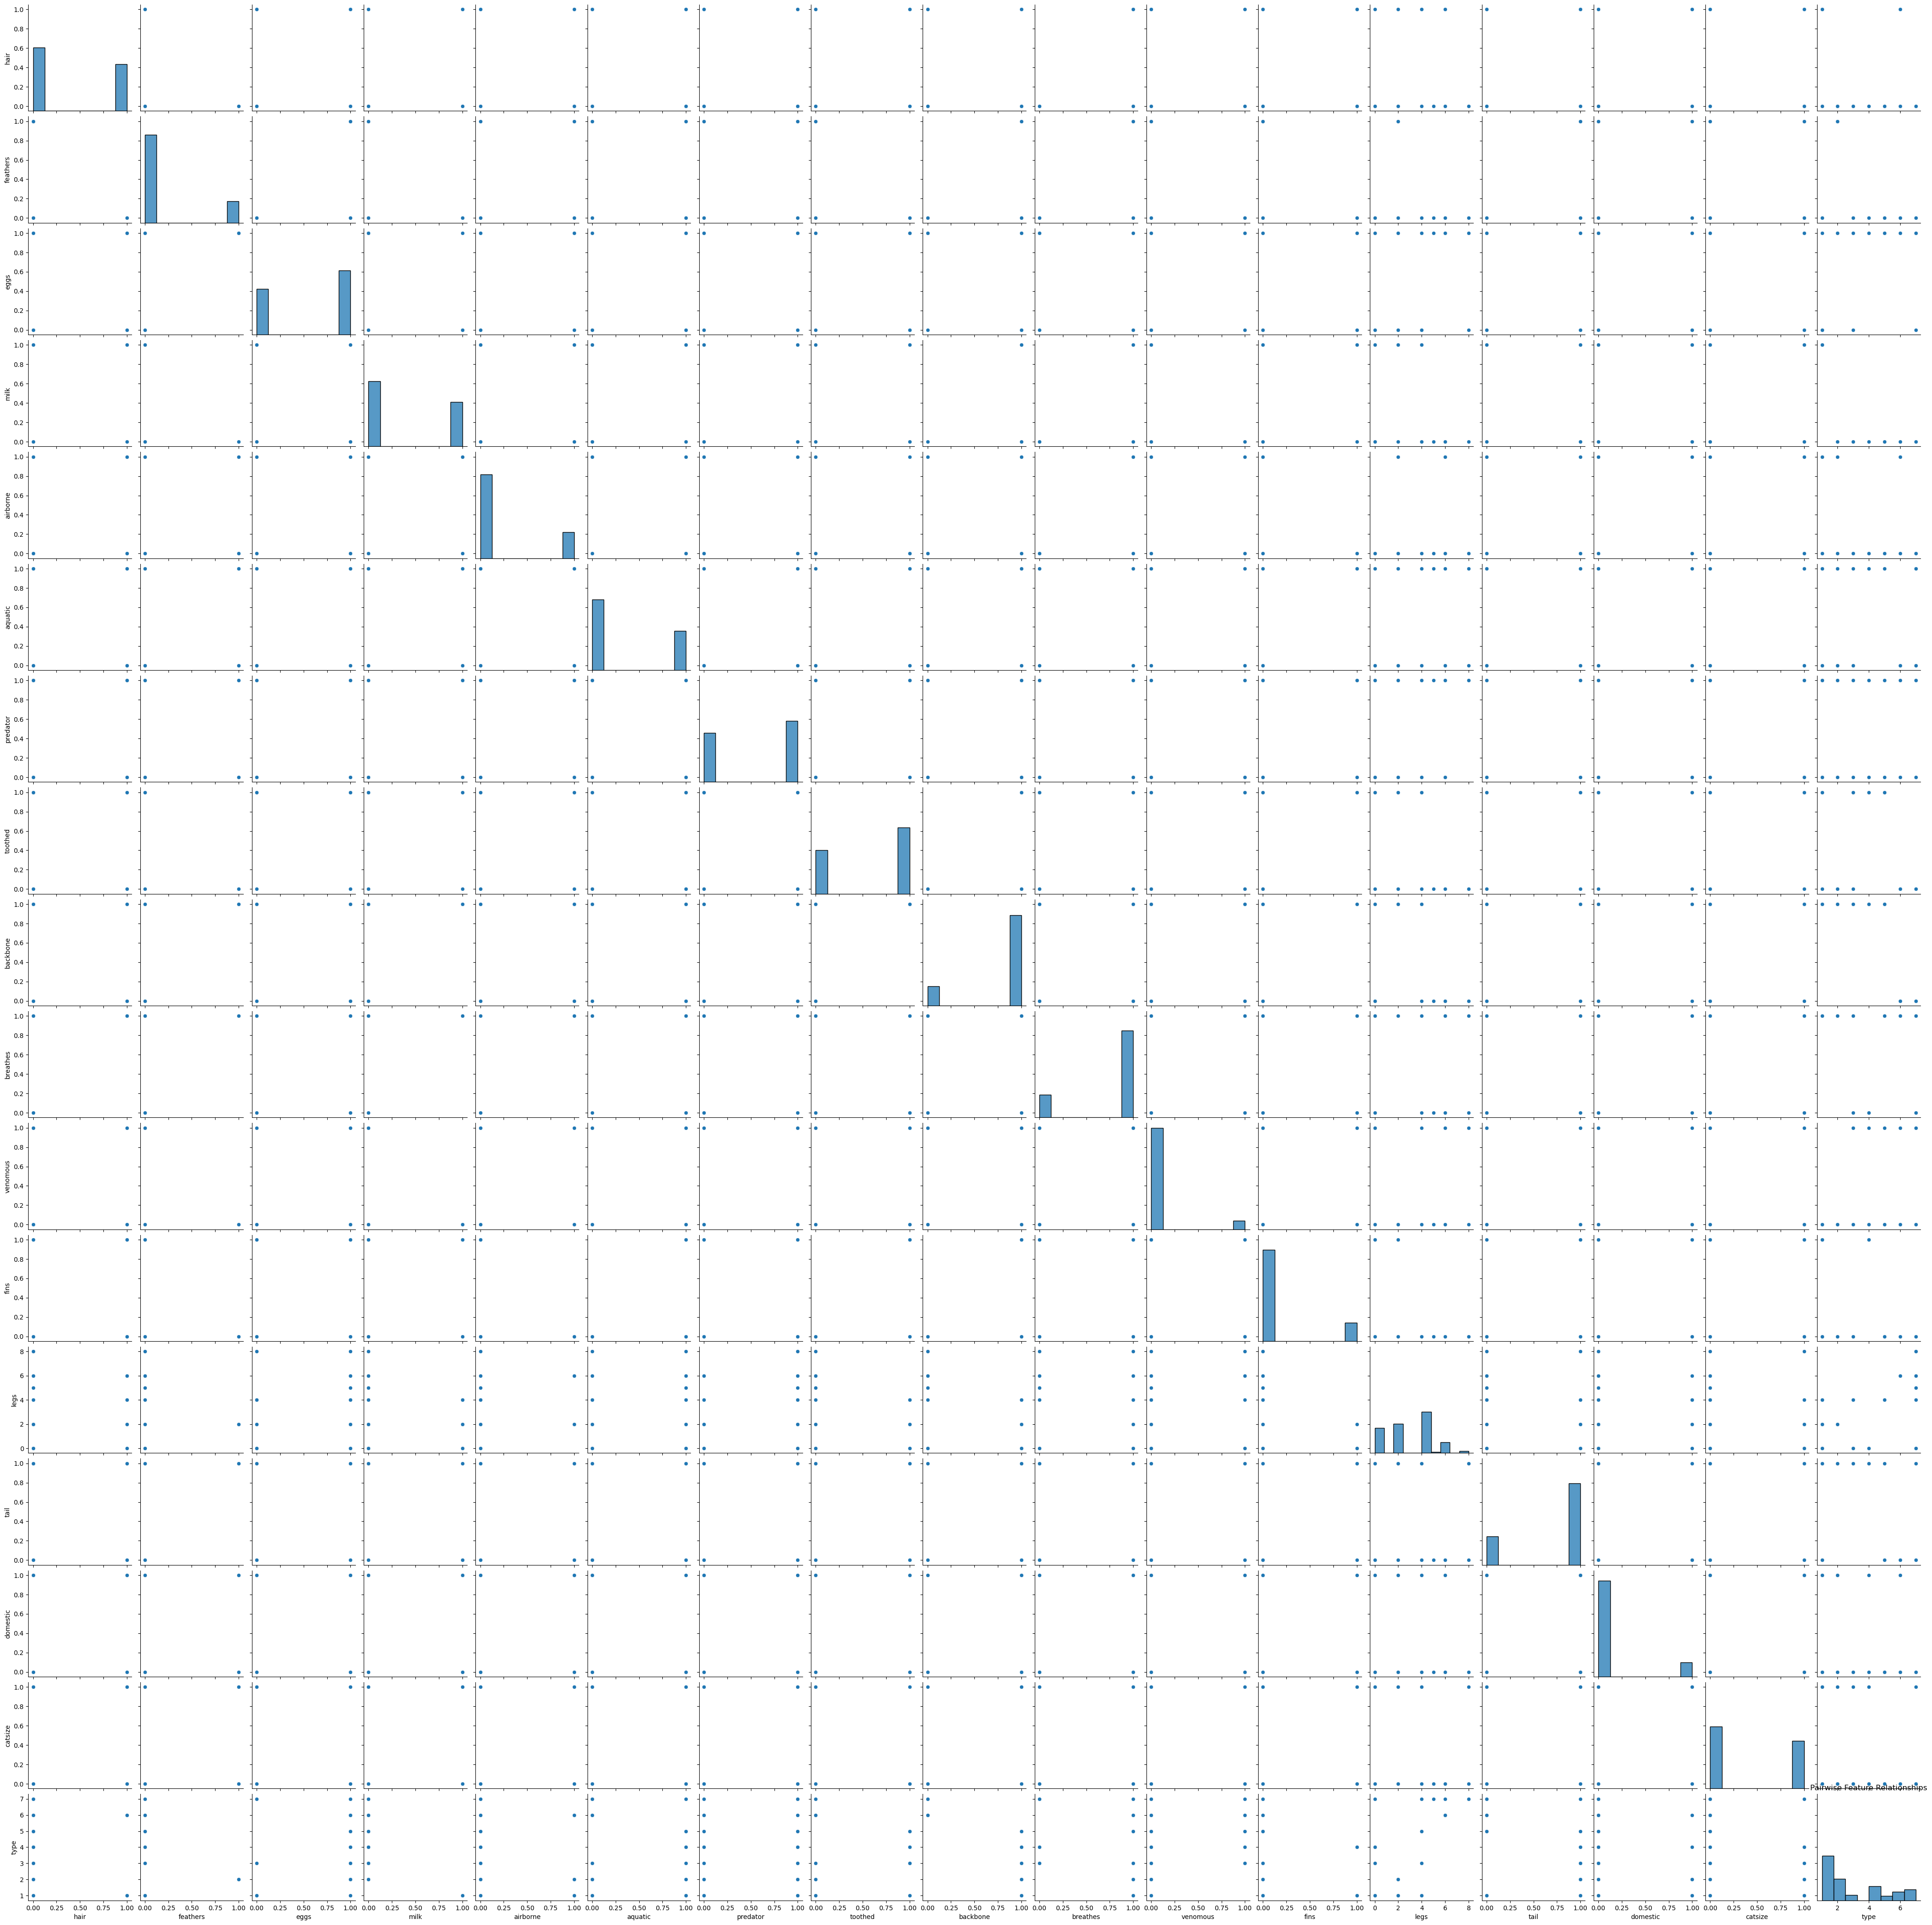

In [10]:
sns.pairplot(data)
plt.title("Pairwise Feature Relationships")
plt.show()

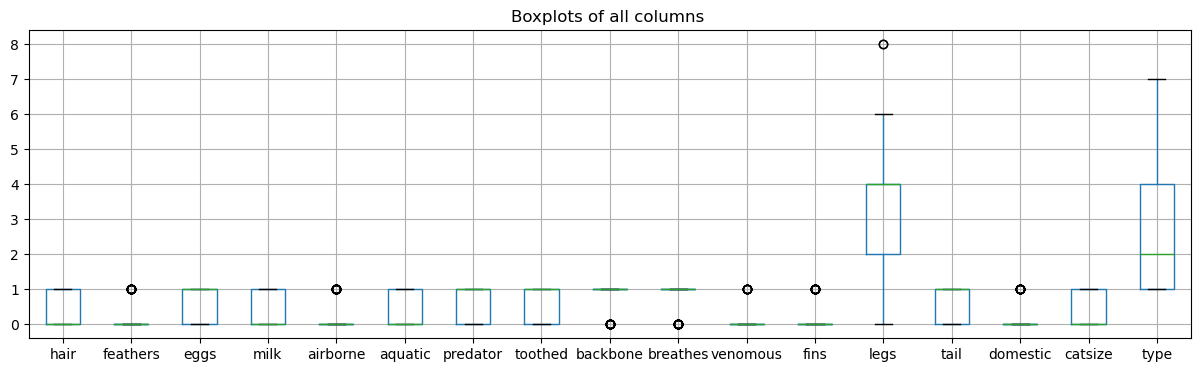

In [11]:
df_subset = data.iloc[:,:18]
df_subset.boxplot(figsize=(15,4))
plt.title("Boxplots of all columns ")
plt.show()

##### 2. Preprocess the data by handling missing values & Outliers, if any.

In [12]:
data.isnull().sum().sum()

0

In [13]:
data.duplicated().sum()

0

##### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [14]:
## splitting the features and target columns
features=data.drop(['animal name','type'], axis=1)
target= data['type']

print("Feature Columns:",features.head())
print("Target Columns:" ,target.head())

Feature Columns:    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1  
Target Columns: 0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [16]:
## Spliting the data into train_test
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.80,random_state=100)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


##### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [18]:
##Model Building
knn =KNeighborsClassifier(n_neighbors =10)

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
y_pred=knn.predict(x_test)

In [21]:
y_pred

array([2, 4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 6, 1, 1, 6, 1, 4, 1, 2, 2, 1],
      dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred)

0.8571428571428571

We are getting the accuracy as around 85% ,when we randomly choose the n_neighbors value as 10

##### 5. Choose an appropriate distance metric and value for K.

In [24]:
## By using GridSearch, we can select the best n_neighbors to get the good accuracy.
params = {
    'n_neighbors':list(range(1, 31)),                  #testing for k from 1 to 30
    'metric':['euclidean','manhattan','minkowski'],    #metric calculation method
    'p':[1,2]                                          # p=1=manhattan, p=2=euclidean
}

knn = KNeighborsClassifier()

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
#perform GridSearch with crossvalidation
grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [27]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'p': 1}

In [28]:
grid_search.best_score_

0.975

We have got the accuracy score as 97% after searching for thr best neigbors using the Grid Search method.

In [29]:

# Now Let's build the model with the best parameters
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1)

In [30]:
y_pred=best_knn.predict(x_test)
y_pred

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 5, 6, 1, 4, 1, 2, 2, 1],
      dtype=int64)

##### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_knn.predict(x_test)
print("Accuracy Score on Test Data is : ",accuracy_score(y_pred, y_test))
print("Recall Score on Test Data is : ",recall_score(y_pred, y_test, average = 'weighted'))
print("Precision Score on Test Data is : ",precision_score(y_pred, y_test, average = 'weighted'))
print("F1 Score on Test Data is : ",f1_score(y_pred, y_test, average = 'weighted'))

Accuracy Score on Test Data is :  0.9523809523809523
Recall Score on Test Data is :  0.9523809523809523
Precision Score on Test Data is :  1.0
F1 Score on Test Data is :  0.9714285714285713


##### 7. Visualize the decision boundaries of the classifier.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [33]:
pip install mlxtend

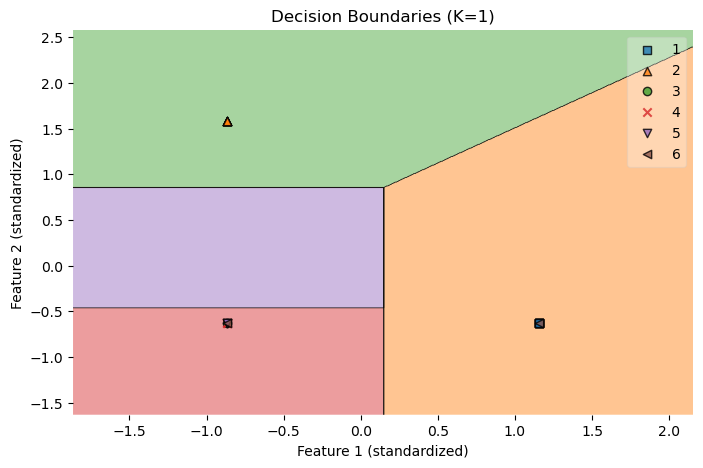

In [34]:
#visualising the decision boundries (using first two columns)
from mlxtend.plotting import plot_decision_regions

x_train_visual=x_train[:, :2]
x_test_visual=x_test[:, :2]
# print(x_train_visual)
# print(x_test_visual)

knn_vis=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_vis.fit(x_train_visual, y_train)

plt.figure(figsize=(8,5))
plot_decision_regions(x_test_visual,y_test.to_numpy(),clf=knn_vis)#, legends=2)  #clf defines the nsme of classifier which prdicts the label
plt.title(f"Decision Boundaries (K={1})")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.show()

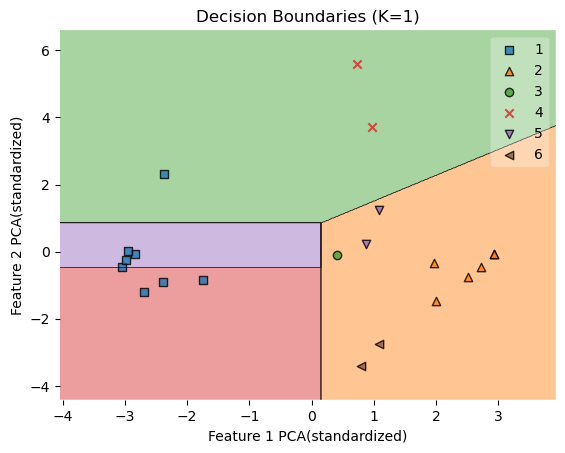

In [35]:
#we will be using PCA to reduce the dimension of the dataset and used all the columns to plot the decision boundries
from sklearn.decomposition import PCA

# reducing the dataset for 2-D visualisation
pca=PCA(n_components=2)
x_train_vis=pca.fit_transform(x_train)
x_test_vis=pca.fit_transform(x_test)

# fitting the model
knn_via=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_vis,y_train)

plot_decision_regions(x_test_vis,y_test.to_numpy(),clf=knn_vis)
plt.title(f"Decision Boundaries (K={1})")
plt.xlabel("Feature 1 PCA(standardized)")
plt.ylabel("Feature 2 PCA(standardized)")
plt.show()